In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [1]:
!ls figs

cinza.jpg     HubIA_Poligonos_data_cultura.csv	JP2.jpg  logo.png    tetris.png
cinzaout.jpg  imgTeste.jpg			JP.jpeg  messi5.jpg


## Convertendo imagem para escala de cinza

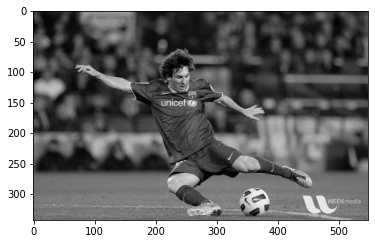

In [5]:
img = cv.imread('/home/silvio/messi5.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

## Aplicando filtro do tipo blur
* Suavização de imagem

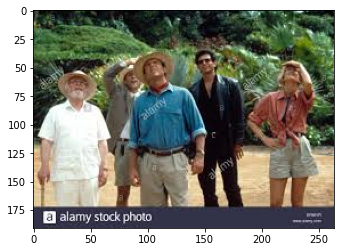

In [12]:
img = cv.imread('figs/JP.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

* blur variando tamanho da máscara: 5, 11, 17
* Suavização fica mais intensa a medida que aumentamos o tamanho da máscara

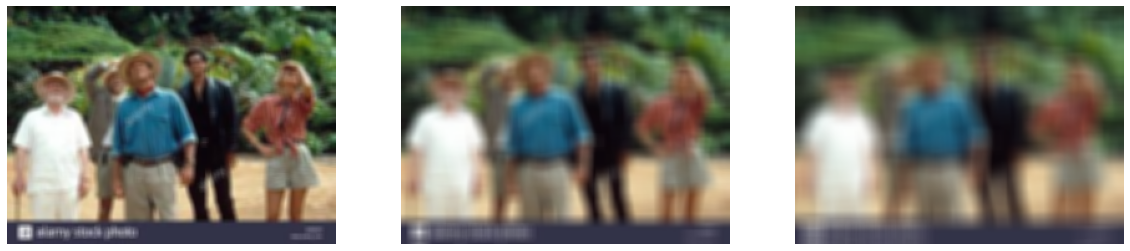

In [13]:
# Plot the image with different kernel sizes
kernels = [5, 11, 17]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

## Aplicando diferentes tipos de blur

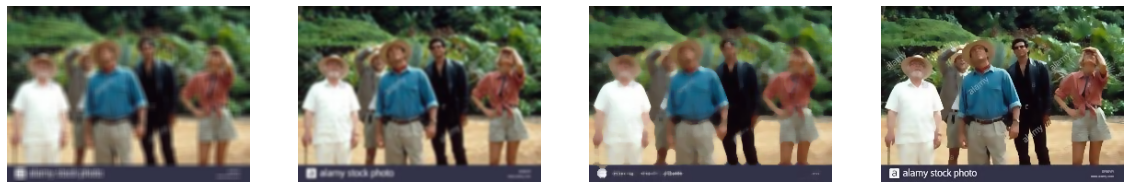

In [15]:
# Blur the image 
img_0 = cv.blur(img, ksize = (7, 7))
img_1 = cv.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv.medianBlur(img, 7)
img_3 = cv.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)
# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

## Thresholding

* Thresholding transforma imagens em imagens binárias. 
* Com base em um valor limite e um valor máximo
* Ao aplicar essa operação, os pixels acima do limiar são alterados para o máximo e os que ficam abaixo são alterados para outro valor, que depende da estratégia de Thresholding

* Alguns tipos de Thresholding: 
    * binário
    * Binário inverso
    * limiar para zero
    * limiar para zero invertido 
    * truncamento de limiar.
    

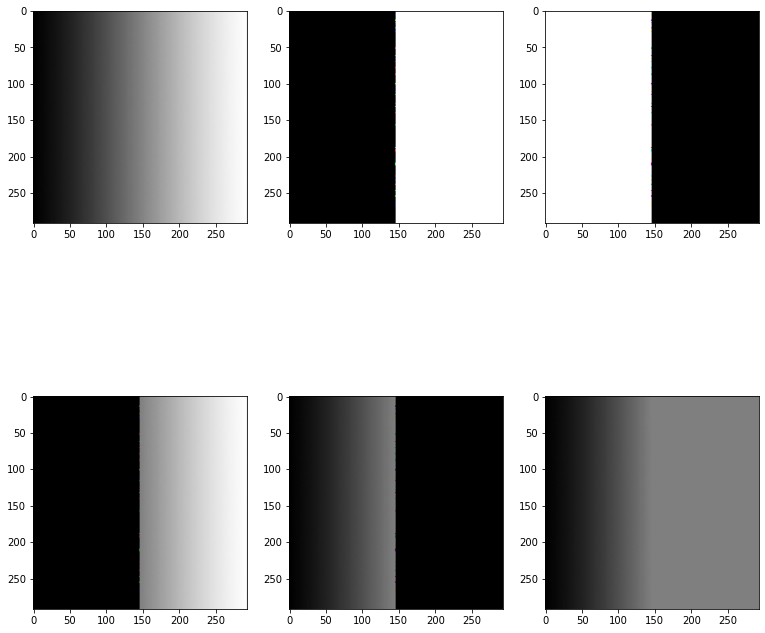

In [29]:
img = cv.imread('figs/degrade.png')

# Thresholding 
_, thresh_0 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
_, thresh_1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
_, thresh_2 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
_, thresh_3 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
_, thresh_4 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()


* Usar um único valor de thresholding na imagem pode ser desafiador
* Uma abordagem melhor seria usar limites diferentes para cada parte da imagem. 
* Existe outra técnica chamada limiar adaptativo, que serve esse problema. 
* Ao calcular o limite dentro da área vizinha da imagem, podemos obter um melhor resultado com imagens com iluminação variável.

In [26]:
# Convert the image to grayscale
img = cv.imread('figs/JP.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv.threshold(img, thresh = 127, maxval = 255, type = cv.THRESH_BINARY)
adap_mean_2 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv.adaptiveThreshold(img, 255, 
                                        cv.ADAPTIVE_THRESH_MEAN_C, 
                                        cv.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_MEAN_C, 
                                    cv.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv.adaptiveThreshold(img, 255, 
                                    cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv.THRESH_BINARY, 7, 8)

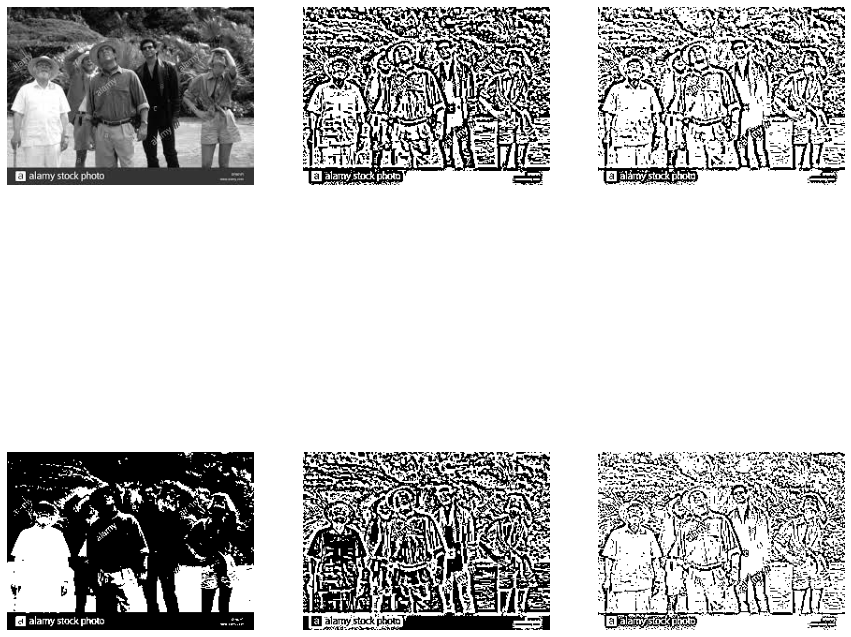

In [27]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, 
          adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
plt.show()

## Segundo exemplo com thresholding

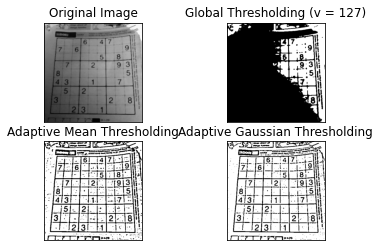

In [14]:

img = cv.imread('sudoku.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Comparando filtro blur com operação filter2D genérica

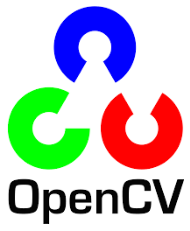

In [25]:
img1 = cv.imread('/home/silvio/opencvlogo.png')
plt.axis("off")
plt.imshow(img1)
plt.show()

# Aplicando filtro de blur 5x5
* Usando função filter2D

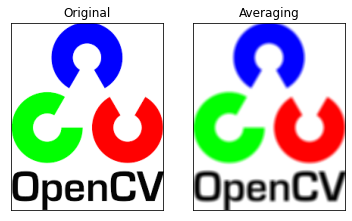

In [34]:
img = cv.imread('/home/silvio/opencvlogo.png')

# Kernel do filtro
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Blur
* Usando função blur 

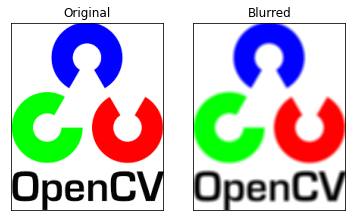

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


## Filtro de sobel

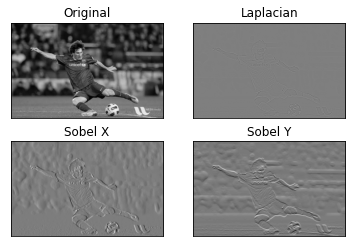

In [46]:
#img = cv.imread('figs/JP.jpeg')
img = cv.imread('figs/messi5.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## Transformações Morfológicas

* São processos que alteram a estrutura da imagem

## Erosão: 

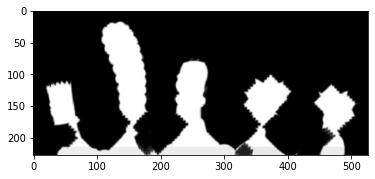

In [32]:
img = cv.imread('figs/simpsons.png')
plt.imshow(img_copy)

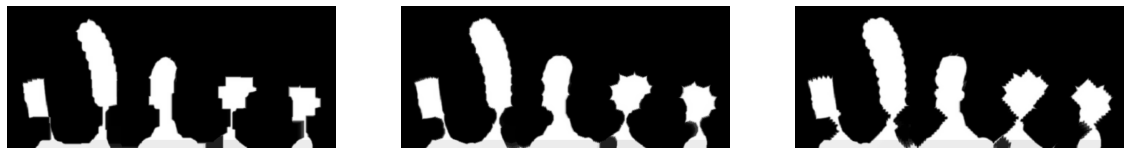

In [31]:
img = cv.imread('figs/simpsons.png')

#Criando kernels (filtros) para erosão
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv.getStructuringElement(cv.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]


plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

## Dilatação

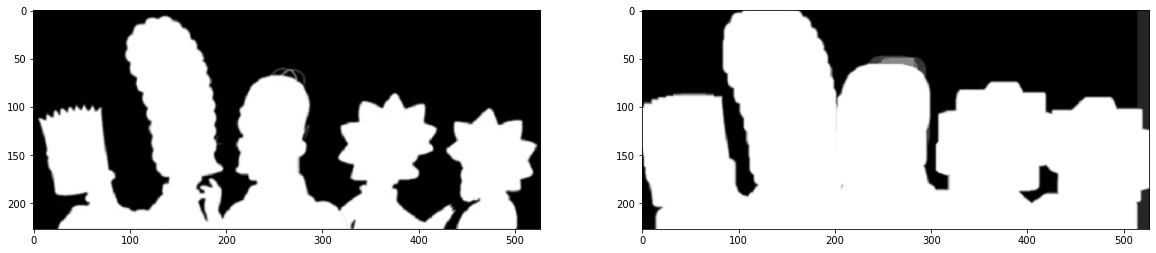

In [33]:
# Apply dilation
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.show()

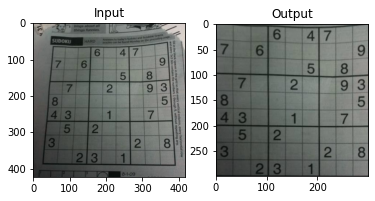

In [12]:
img = cv.imread('sudoku.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Outro exemplo de Dilatação e Erosão

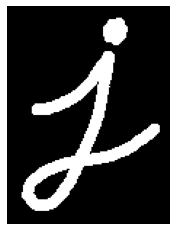

In [35]:
img = cv.imread('j.png')

plt.axis("off")
plt.imshow(img)
plt.show()

## Erosão

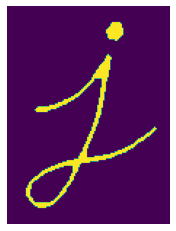

In [69]:
import cv2 as cv
import numpy as np
img = cv.imread('figs/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

plt.axis("off")
plt.imshow(erosion)
plt.show()

## Dilatação

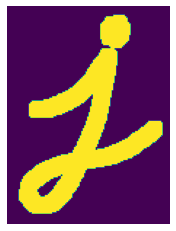

In [70]:
import cv2 as cv
import numpy as np
img = cv.imread('figs/j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.axis("off")
plt.imshow(dilation)
plt.show()

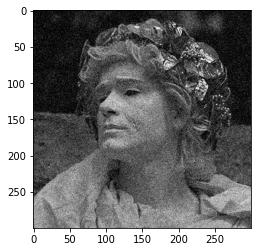

In [74]:
img = cv.imread('figs/noisy.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

## Fechamento

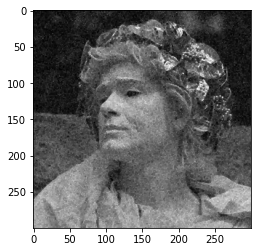

In [77]:
img = cv.imread('figs/noisy.jpg',0)
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

img = cv.cvtColor(closing, cv.COLOR_BGR2RGB)

plt.imshow(img)


## Abertura

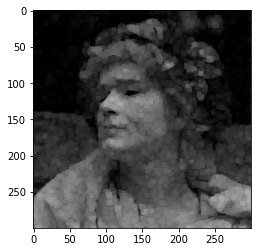

In [75]:
img = cv.imread('figs/noisy.jpg',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

img = cv.cvtColor(opening, cv.COLOR_BGR2RGB)

plt.imshow(img)

## Gradiente morfologico

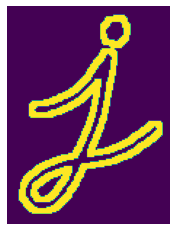

In [45]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.axis("off")
plt.imshow(gradient)
plt.show()


## Tophat

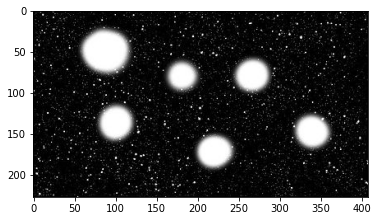

In [51]:
img = cv.imread('figs/blobs.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

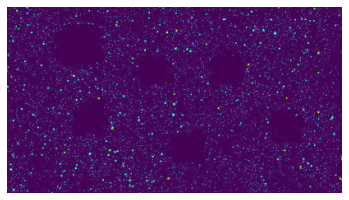

In [60]:
img = cv.imread('figs/blobs.png',0)
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.axis("off")
plt.imshow(tophat)
plt.show()

## Filtros

## Canny edge
* Filtro para detecção de borda

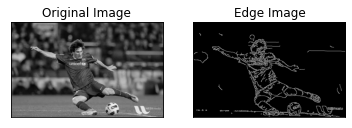

In [37]:

img = cv.imread('figs/messi5.jpg',0)

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Detectando círculos

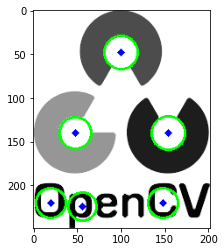

In [41]:
img = cv.imread('/home/silvio/opencvlogo.png',0)

img = cv.medianBlur(img,5)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    
plt.imshow(cimg)
plt.show()

## Hough Lines 
* Detecção de linhas

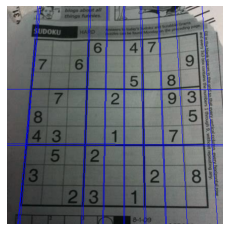

In [44]:

img = cv.imread(cv.samples.findFile('figs/sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),1)

cv.imwrite('houghlines3.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()

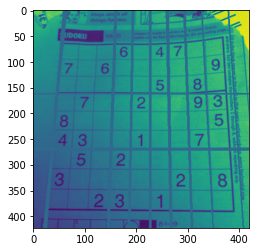

In [43]:
img = cv.imread('houghlines3.jpg',0)

plt.imshow(img)
plt.show()

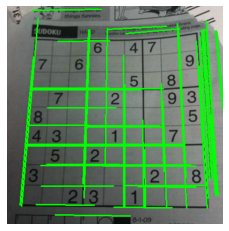

In [67]:
import cv2 as cv
import numpy as np
img = cv.imread(cv.samples.findFile('sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlines5.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()

# Detecção facial (padrão configurável)
* CascadeClassifier opencv - função que utiliza um padrão treinado previamente para detectar padrões na imagem
* Site com alguns padrões disponíveis: https://github.com/opencv/opencv/tree/master/data/haarcascades

In [182]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [183]:
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
 
    print(len(face_rects))
    for (x, y, w, h) in face_rects:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2

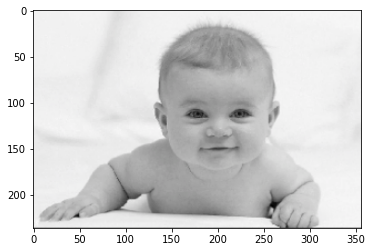

In [184]:
img = cv.imread('figs/baby.png')
plt.imshow(img, cmap = 'gray')


1


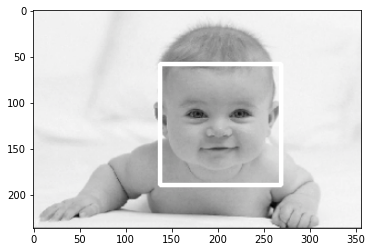

In [185]:
roi_detected = detect_face(img)
plt.imshow(roi_detected, cmap = 'gray')


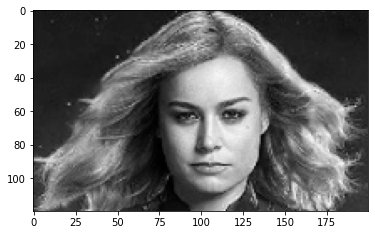

In [190]:
cap_mavl = cv.imread('figs/hero.png')

roi = cap_mavl[30:150, 80:280]
roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')


1


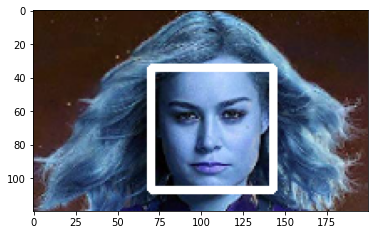

In [191]:
cap_mavl = cv.imread('figs/hero.png')

roi = cap_mavl[30:150, 80:280]
#roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
#plt.imshow(roi, cmap = 'gray')

roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.imshow(roi_detected)

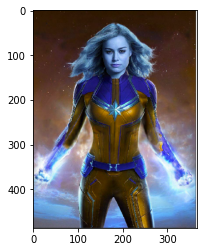

In [188]:
cap_mavl = cv.imread('figs/hero.png')
plt.imshow(cap_mavl, cmap = 'gray')

3


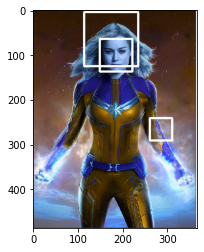

In [189]:
roi_detected = detect_face(cap_mavl)
plt.imshow(roi_detected, cmap = 'gray')